**Project 2: Prediction of Housing Sale Prices**
***

# Introduction

In this next part, I will perform a few different types of modelling (OLS, Ridge, Lasso) on the train/holdout datasets and the full train/test datasets. 

## Import libraries and Load Data

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import math
import matplotlib.ticker as ticker

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV

%matplotlib inline

In [34]:
full_train = pd.read_csv(r'../datasets/full_training_set.csv')
full_test = pd.read_csv(r'../datasets/full_test_set.csv')

## Functions for modelling

I have written a few functions to make running the different types of modelling easier. These are namely for Linear Regression, Ridge and Lasso.

In [35]:
def linear_regression(X_train, X_test, y_train, y_test):
    '''Function for computing statistical outcomes with sklearn's LinearRegression'''
    
    lr = LinearRegression()
    
    #Fit train set
    lr.fit(X_train, y_train)
    
    mean_LR_cv_score = np.round(cross_val_score(lr, X_train, y_train, cv=10).mean(),5)
    
    LR_train_R2 = np.round(lr.score(X_train, y_train),5)
    LR_test_R2 = np.round(lr.score(X_test, y_test),5)
    
    LR_train_MSE = np.round(mean_squared_error(y_train, lr.predict(X_train)),5)
    LR_test_MSE = np.round(mean_squared_error(y_test, lr.predict(X_test)),5)
    
    LR_train_RMSE = np.round(np.sqrt(mean_squared_error(y_train, lr.predict(X_train))),5)
    LR_test_RMSE = np.round(np.sqrt(mean_squared_error(y_test, lr.predict(X_test))),5)
    
    print(" OLS ".center(18, "=")+'\n')
    
    print(f'mean LR cross val score is: {mean_LR_cv_score}'+'\n')
    
    print(f'LR train R2 is: {LR_train_R2}')
    print(f'LR test R2 is: {LR_test_R2}'+'\n')
       
    print(f'LR train MSE is: {LR_train_MSE}')
    print(f'LR test MSE is: {LR_test_MSE}'+'\n')
    
    print(f'LR train RMSE is: {LR_train_RMSE}')
    print(f'LR test RMSE is: {LR_test_RMSE}'+'\n')

In [36]:
def ridgeCV(X_train, X_test, y_train, y_test):
    '''Function for computing statistical outcomes with sklearn's Ridge and RidgeCV'''
    
    #Find optimal alpha for Ridge regression with RidgeCV
    ridge_cv = RidgeCV(
        alphas = np.logspace(-5, 5, 50),
        cv=10
    )
    
    #Fit train set
    ridge_cv.fit(X_train, y_train)
    
    #Ridge cross val with best alpha
    ridge_cv_optimal = cross_val_score(
        Ridge(alpha = ridge_cv.alpha_), 
        X_train, 
        y_train, 
        cv= 10
    )

    best_ridge_alpha = np.round(ridge_cv.alpha_,5)
    mean_ridge_cv_score = np.round(ridge_cv_optimal.mean(),5)
    
    ridge_train_R2 = np.round(ridge_cv.score(X_train, y_train),5)
    ridge_test_R2 = np.round(ridge_cv.score(X_test, y_test),5)
    
    ridge_train_MSE = np.round(mean_squared_error(y_train, ridge_cv.predict(X_train)),5)
    ridge_test_MSE = np.round(mean_squared_error(y_test, ridge_cv.predict(X_test)),5)
    
    ridge_train_RMSE = np.round(np.sqrt(mean_squared_error(y_train, ridge_cv.predict(X_train))),5)
    ridge_test_RMSE = np.round(np.sqrt(mean_squared_error(y_test, ridge_cv.predict(X_test))),5)
    
    print(f'best Ridge alpha is: {best_ridge_alpha}')
    print(f'mean Ridge cross val score is: {mean_ridge_cv_score}'+'\n')
    
    print(f'Ridge train R2 is: {ridge_train_R2}')
    print(f'Ridge test R2 is: {ridge_test_R2}'+'\n')
       
    print(f'Ridge train MSE is: {ridge_train_MSE}')
    print(f'Ridge test MSE is: {ridge_test_MSE}'+'\n')
    
    print(f'Ridge train RMSE is: {ridge_train_RMSE}')
    print(f'Ridge test RMSE is: {ridge_test_RMSE}'+'\n')

In [37]:
def lassoCV(X_train, X_test, y_train, y_test):
    '''Function for computing statistical outcomes with sklearn's Lasso and LassoCV'''
    
    #Find optimal alpha for Lasso regression with LassoCV
    lasso_cv = LassoCV(
        alphas = np.logspace(-5, 5, 100),
        cv=10
    )

    #Fit train set
    lasso_cv.fit(X_train, y_train)

    #Lasso cross val with best alpha
    lasso_cv_optimal = cross_val_score(
        Lasso(alpha = lasso_cv.alpha_), 
        X_train, 
        y_train, 
        cv= 10
    )

    best_lasso_alpha = np.round(lasso_cv.alpha_,5)
    mean_lasso_cv_score = np.round(lasso_cv_optimal.mean(),5)
    
    lasso_train_R2 = np.round(lasso_cv.score(X_train, y_train),5)
    lasso_test_R2 = np.round(lasso_cv.score(X_test, y_test),5)
    
    lasso_train_MSE = np.round(mean_squared_error(y_train, lasso_cv.predict(X_train)),5)
    lasso_test_MSE = np.round(mean_squared_error(y_test, lasso_cv.predict(X_test)),5)
    
    lasso_train_RMSE = np.round(np.sqrt(mean_squared_error(y_train, lasso_cv.predict(X_train))),5)
    lasso_test_RMSE = np.round(np.sqrt(mean_squared_error(y_test, lasso_cv.predict(X_test))),5)
    
    print(" Lasso ".center(18, "=")+'\n')
    
    print(f'best Lasso alpha is: {best_lasso_alpha}')
    print(f'mean Lasso cross val score is: {mean_lasso_cv_score}'+'\n')
    
    print(f'Lasso train R2 is: {lasso_train_R2}')
    print(f'Lasso test R2 is: {lasso_test_R2}'+'\n')
       
    print(f'Lasso train MSE is: {lasso_train_MSE}')
    print(f'Lasso test MSE is: {lasso_test_MSE}'+'\n')
    
    print(f'Lasso train RMSE is: {lasso_train_RMSE}')
    print(f'Lasso test RMSE is: {lasso_test_RMSE}'+'\n')

## Model Prep

To start, we are working on the train/holdout splits based on the full_train dataset.

### Create X and y variables + Train/Test Split

In [38]:
#Train/Test split of the full train set into train and holdout (named as test here) sets
 
X = full_train.drop(columns=['SalePrice', 'Ln_SalePrice'])
y = full_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Scaling X variables

In [39]:
#Scaled variables named as Z

ss = StandardScaler()
Z_train = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
Z_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

## Baseline

For the baseline model, I have used a simple linear regression model with 'Overall_Qual' and 'Gr_Live_Area'as the independent variables. I have chosen these two features because they have the highest positive correlation with 'SalePrice' (discussed in further detail in next section). Intuitively, they make sense as well - the larger in size / better in quality of the property, the higher the sales price. 

Results based on a linear regression are displayed below. RMSE for this baseline model is 39,513 on the test set - slightly better than the RMSE on the train set which is 39,779. R2 is not that great at around 0.75 on the test set.

In [40]:
Z_baseline_train = Z_train[['Overall_Qual','Gr_Liv_Area']]
Z_baseline_test = Z_test[['Overall_Qual','Gr_Liv_Area']]

In [41]:
%%time

linear_regression(Z_baseline_train, Z_baseline_test, y_train, y_test)

====== OLS =======

mean LR cross val score is: 0.74039

LR train R2 is: 0.74772
LR test R2 is: 0.75304

LR train MSE is: 1582398150.31587
LR test MSE is: 1561288337.65623

LR train RMSE is: 39779.3684
LR test RMSE is: 39513.14133

CPU times: user 198 ms, sys: 6.06 ms, total: 204 ms
Wall time: 79.3 ms


## Model with all features 

I have now generated 181 features after the data cleaning and feature engineering steps in part 1. I will run a model based on all these features in the next step below - however, as the results below show, **this is not very useful**. The test RMSE and R2 are way off from the train set as there will be a lot of X variables that display high collinearity with each other. 


I will further narrow down the features to use in the subsequent few sections.

In [42]:
Z_train_maximal = Z_train
Z_test_maximal = Z_test

In [43]:
%%time

linear_regression(Z_train_maximal, Z_test_maximal, y_train, y_test)

====== OLS =======

mean LR cross val score is: -1.9337683393545428e+18

LR train R2 is: 0.93694
LR test R2 is: -1.1811900390117172e+22

LR train MSE is: 395534275.57291
LR test MSE is: 7.467618745863323e+31

LR train RMSE is: 19888.04353
LR test RMSE is: 8641538489102113.0

CPU times: user 638 ms, sys: 14 ms, total: 652 ms
Wall time: 173 ms


## Model with selected features

My suspicion is that there will a sizeable number of features that can be dropped. To determine what features to select/drop, I have run two processes below:


   1. **Correlation with Sale Price** - there should be some features with high correlation with the target variable and should be good predictors of 'SalePrice'
   2. **Multicollinearity** - features that show high collinearity should either be dropped/linearly transformed

### High correlation with 'Sale Price'

- I have computed the correlation of all the features with the target variable 'SalePrice'. There are some features that display a good level of positive correlation with 'SalePrice'.
- Apart from the interaction features, these are 'Overall Quality', 'Gross Living Area' etc. As seen in the previous section, I have also used these two features to form my *baseline model*.
- In addition, there are some other features which display low correlation as there are too few observations for them to have any predictive ability (e.g. only 8 properties with pools - hence 'Pool QC' and 'Pool Area' show little correlation with 'SalePrice').  
- **There are 49 features in this model, and I have selected them if their correlation (+ & -) with 'SalePrice' is > |0.25|**

#### Selection of features

I have plotted a heaptmap to reflect features with high correlation to 'SalePrice'. As mentioned, the heatmap below only displays features with correlation >|0.25|.

In [44]:
#Sorting features based on correlation with 'SalePrice'
#Filter correlation > |0.25|

full_train_corr = full_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
highest_corr = full_train_corr.loc[(full_train_corr['SalePrice'] > 0.25) | (full_train_corr['SalePrice'] < -0.25), :]

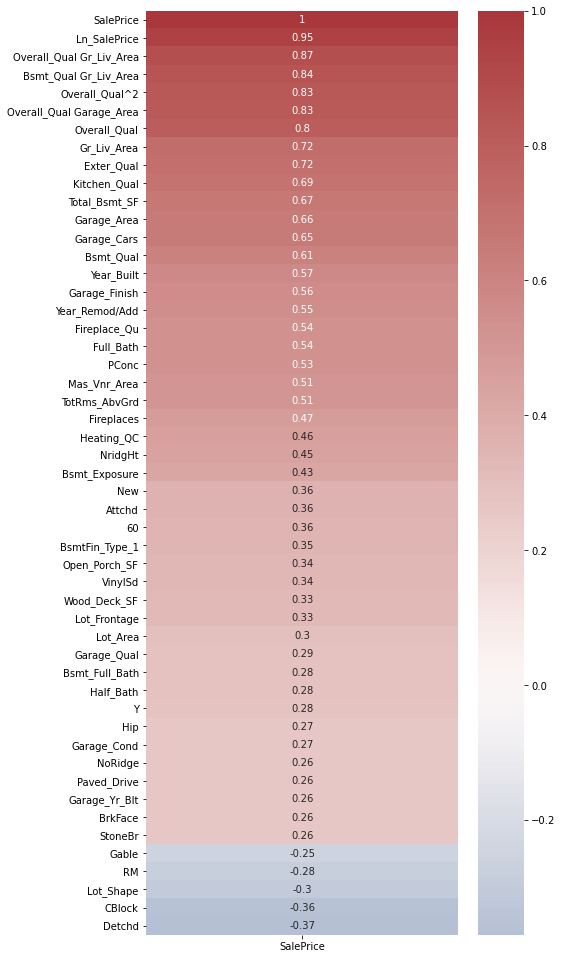

In [45]:
plt.figure(figsize =(7,17))
sns.heatmap(highest_corr, annot=True, cmap="vlag", center=0);

In [46]:
#List of 49 features with the highest correlation with 'SalePrice'
highest_corr_list = list(highest_corr.drop(index = ['SalePrice','Ln_SalePrice']).index)

#Selecting these 49 features into our scaled X_train and X_test 
Z_train_highest_corr = Z_train[highest_corr_list]
Z_test_highest_corr = Z_test[highest_corr_list]

#### Results

- From the results of the three models, we see that the R2 all better in the test set that the train set. While slighltly higher in the Lasso and Ridge models, RMSE is pretty similar for all three models. This bodes well because it suggest that our models are performing well to unseen data, and there is minimal overfitting. 
- R2 are all above the baseline at around 0.91. The linear regression model performs the best (but only slightly) compared to the Ridge and Lasso models.
- Test set RMSE for the linear regression model is 23,100 compared to 23,159 and 23,186 for the Lasso and Ridge models respectively

In [47]:
%%time

linear_regression(Z_train_highest_corr, Z_test_highest_corr, y_train, y_test)

====== OLS =======

mean LR cross val score is: 0.90178

LR train R2 is: 0.91487
LR test R2 is: 0.9156

LR train MSE is: 533978730.32073
LR test MSE is: 533615789.58507

LR train RMSE is: 23107.9798
LR test RMSE is: 23100.12532

CPU times: user 278 ms, sys: 5.75 ms, total: 284 ms
Wall time: 77.6 ms


In [48]:
%%time

ridgeCV(Z_train_highest_corr, Z_test_highest_corr, y_train, y_test)

best Ridge alpha is: 3.23746
mean Ridge cross val score is: 0.90194

Ridge train R2 is: 0.91471
Ridge test R2 is: 0.91496

Ridge train MSE is: 534945445.05347
Ridge test MSE is: 537633795.65352

Ridge train RMSE is: 23128.88767
Ridge test RMSE is: 23186.93157

CPU times: user 9.55 s, sys: 118 ms, total: 9.66 s
Wall time: 2.52 s


In [49]:
%%time

lassoCV(Z_train_highest_corr, Z_test_highest_corr, y_train, y_test)

===== Lasso ======

best Lasso alpha is: 46.41589
mean Lasso cross val score is: 0.90211

Lasso train R2 is: 0.91469
Lasso test R2 is: 0.91516

Lasso train MSE is: 535079578.43876
Lasso test MSE is: 536342609.90948

Lasso train RMSE is: 23131.78719
Lasso test RMSE is: 23159.07187

CPU times: user 2.69 s, sys: 34.3 ms, total: 2.73 s
Wall time: 707 ms


### Reducing collinearity (manually)

- In linear regression, indepedent variables should ideally be - as its name suggests - be independent of each other. While ridge and lasso will effect regularisation on the models, I will try to manually combine/drop some of the highly correlated features (e.g. 'Garage Cars' and 'Garage Area' - a larger garage will fit more cars)
- In order to optimise computing power, I have filtered out features for features that are highly correlated with SalePrice (steps below) and only displying those with correlation of > |0.8|. 
- These are the features that I will be dropping:
    - 'TotRms_AbvGrd' (ρ = 0.81 with 'Gr_Liv_Area')
    - 'Fireplace_Qu' (ρ = 0.86 with 'Fireplace')
    - 'Garage_Cars' (ρ = 0.9 with 'Garage Area')
    - 'Garage_Yr_Blt' (ρ = 0.95 with both 'Garage_Qual' and 'Garage_Cond')
    - 'Garage_Qual' (ρ = 0.95 with 'Garage_Cond')
    - 'Gable' (ρ = -0.95 with 'Hip' - these are common roof types, properties usually have one or the other)

#### Selection of features

I have plotted a 'filtered' heaptmap to reflect features with high collinearity to each. As mentioned, the heatmap below only displays features with correlation >|0.8|.

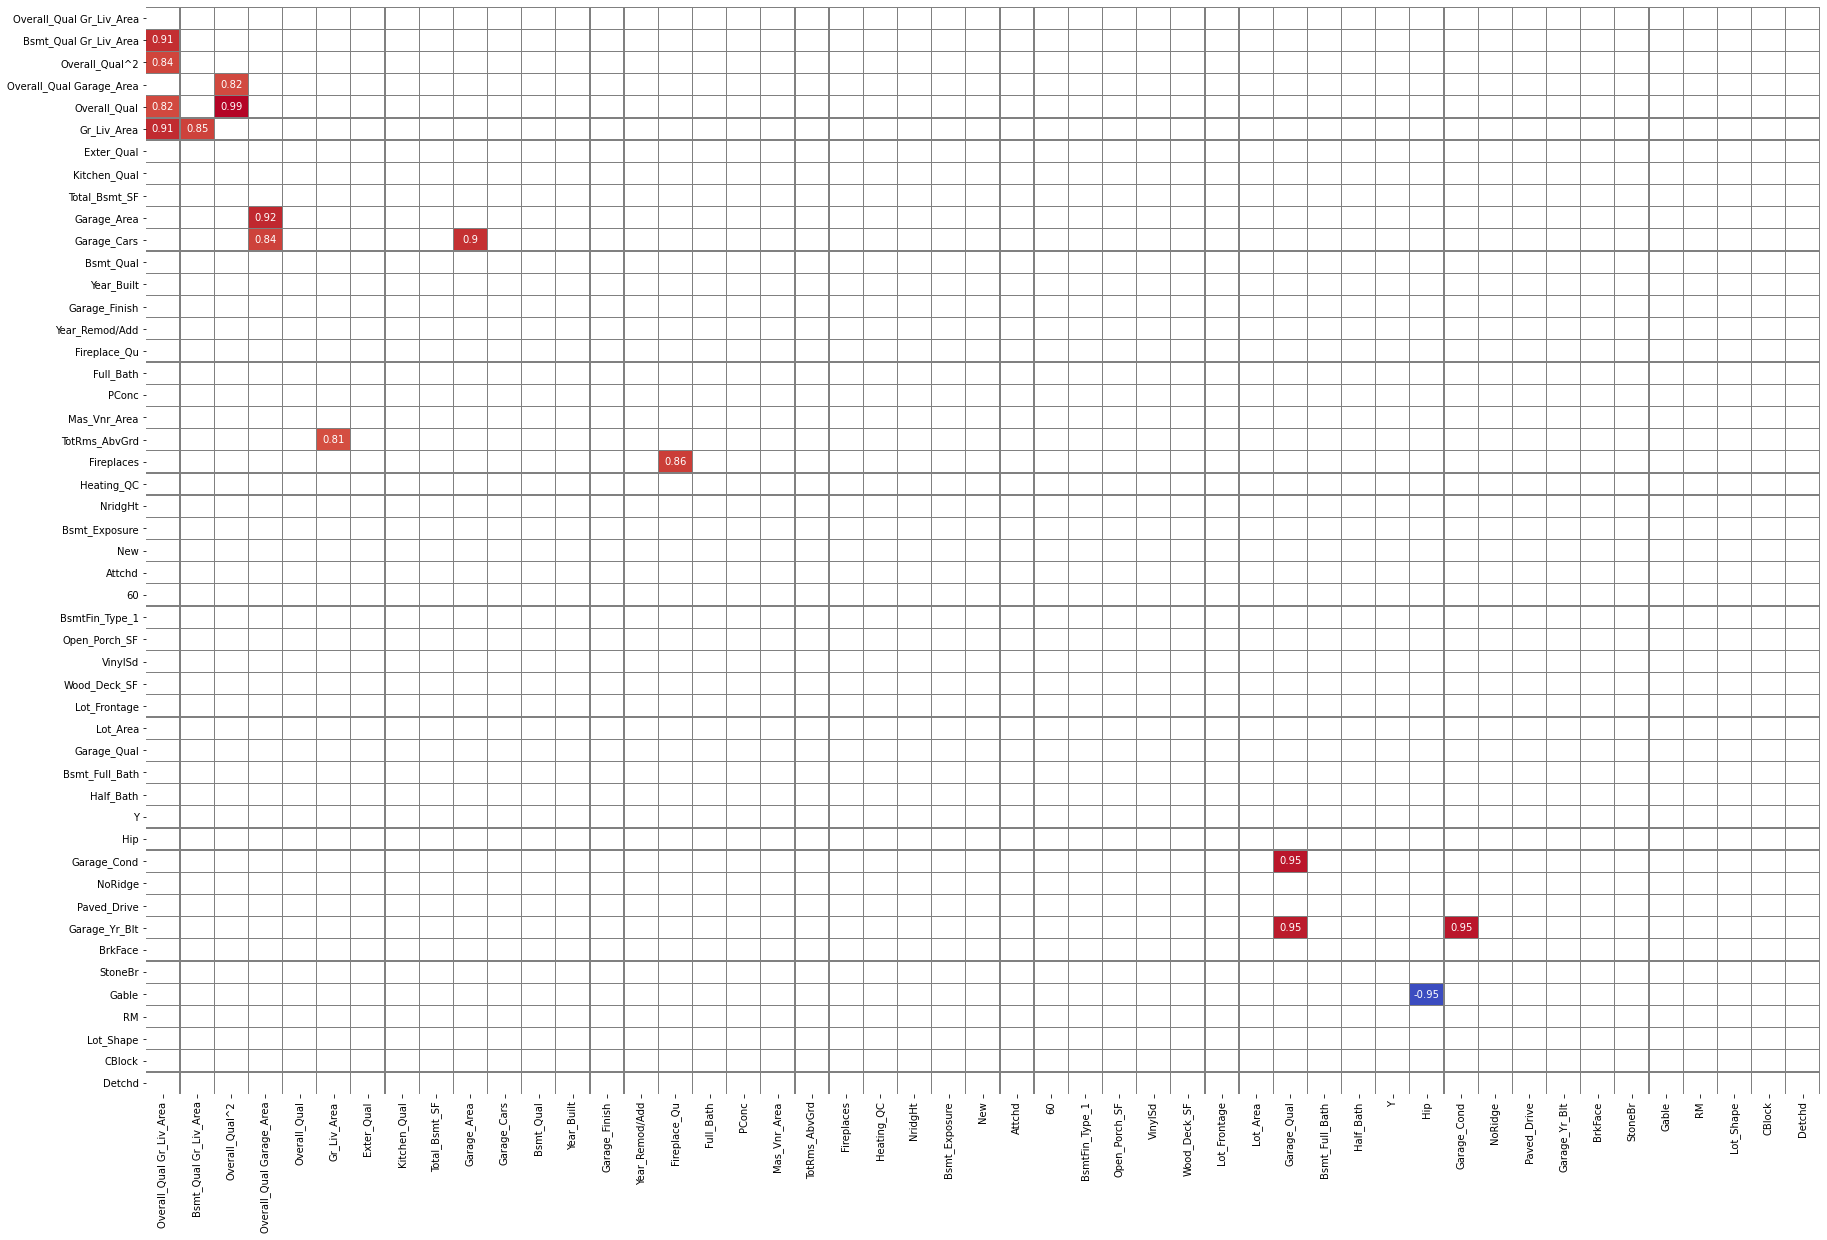

In [50]:
#Further narrow the 'highes_corr_list' by checking for features with high collinearity
heatmap_corr = full_train[highest_corr.index].drop(columns=['SalePrice','Ln_SalePrice']).corr()
filtered_corr = heatmap_corr[((heatmap_corr >= .8) | (heatmap_corr <= -.8)) & (heatmap_corr !=1.000)]

plt.figure(figsize=(30,20))
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", cbar=False, mask=mask, linewidths=.25, linecolor='grey', linestyle='dashed');

In [51]:
#Drop features with high collinearity

Z_train_highest_corr_reduced = Z_train_highest_corr.drop(columns=['TotRms_AbvGrd','Fireplace_Qu','Garage_Cars','Garage_Yr_Blt','Garage_Qual','Gable'])
Z_test_highest_corr_reduced = Z_test_highest_corr.drop(columns=['TotRms_AbvGrd','Fireplace_Qu','Garage_Cars','Garage_Yr_Blt','Garage_Qual','Gable'])

# Z_train_highest_corr_reduced = Z_train_highest_corr.drop(columns=['TotRms_AbvGrd','Fireplace_Qu','Garage_Cars','Garage_Yr_Blt','Garage_Qual','Gable', 'Bsmt_Qual Gr_Liv_Area', 'Overall_Qual Garage_Area'])
# Z_test_highest_corr_reduced = Z_test_highest_corr.drop(columns=['TotRms_AbvGrd','Fireplace_Qu','Garage_Cars','Garage_Yr_Blt','Garage_Qual','Gable', 'Bsmt_Qual Gr_Liv_Area', 'Overall_Qual Garage_Area'])

# Z_train_highest_corr_reduced = Z_train_highest_corr.drop(columns=['TotRms_AbvGrd','Fireplace_Qu','Garage_Cars','Garage_Yr_Blt','Garage_Qual','Gable','Bsmt_Qual Gr_Liv_Area','Overall_Qual Gr_Liv_Area', 'Overall_Qual Garage_Area','Overall_Qual^2'])
# Z_test_highest_corr_reduced = Z_test_highest_corr.drop(columns=['TotRms_AbvGrd','Fireplace_Qu','Garage_Cars','Garage_Yr_Blt','Garage_Qual','Gable', 'Bsmt_Qual Gr_Liv_Area','Overall_Qual Gr_Liv_Area', 'Overall_Qual Garage_Area','Overall_Qual^2'])

#### Results

- Compared to the 'highest_corr_list' features in the previous section, R2 are still above the baseline and at around 0.91. However, the R2 on the test set is better than the train set on the Linear Regression model only. RMSE is higher on the test set compared to train set for all three models (not by much).
- Again, the linear regression model performs the best (but only slightly) compared to the Ridge and Lasso models.
- Test set RMSE for the linear regression model is 23,189 compared to 23,229 and 23,272 for the Lasso and Ridge models respectively

In [52]:
%%time

linear_regression(Z_train_highest_corr_reduced, Z_test_highest_corr_reduced, y_train, y_test)

====== OLS =======

mean LR cross val score is: 0.90206

LR train R2 is: 0.91432
LR test R2 is: 0.91494

LR train MSE is: 537382360.36916
LR test MSE is: 537731372.95718

LR train RMSE is: 23181.50902
LR test RMSE is: 23189.03562

CPU times: user 260 ms, sys: 4.23 ms, total: 264 ms
Wall time: 71 ms


In [53]:
%%time

ridgeCV(Z_train_highest_corr_reduced, Z_test_highest_corr_reduced, y_train, y_test)

best Ridge alpha is: 3.23746
mean Ridge cross val score is: 0.90218

Ridge train R2 is: 0.91418
Ridge test R2 is: 0.91433

Ridge train MSE is: 538307702.21805
Ridge test MSE is: 541590867.61168

Ridge train RMSE is: 23201.45905
Ridge test RMSE is: 23272.10492

CPU times: user 9.19 s, sys: 97 ms, total: 9.29 s
Wall time: 2.37 s


In [54]:
%%time

lassoCV(Z_train_highest_corr_reduced, Z_test_highest_corr_reduced, y_train, y_test)

===== Lasso ======

best Lasso alpha is: 46.41589
mean Lasso cross val score is: 0.90237

Lasso train R2 is: 0.9142
Lasso test R2 is: 0.91464

Lasso train MSE is: 538162076.45424
Lasso test MSE is: 539627451.79529

Lasso train RMSE is: 23198.32055
Lasso test RMSE is: 23229.88273

CPU times: user 2.32 s, sys: 24.8 ms, total: 2.35 s
Wall time: 607 ms


## Conclusion

### Model Comparison

|Feature Selection|No. of Features|Description|Hyperparameters|Train RMSE|Test (Holdout) RMSE|
|---|---|---|---|---|---|
|Baseline|2|Linear Regression|-|39,779|39,513|
|Highest Correlation|49|Linear Regression|-|23,107|23,100|
|Highest Correlation|49|Ridge|-|23,128|23,186|
|Highest Correlation|49|Lasso|-|23,131|23,159|
|Highest Correlation + Reduced Collinearity|43|Linear Regression|-|23,181|23,189|
|Highest Correlation + Reduced Collinearity|43|Ridge|-|23,201|23,272|
|Highest Correlation + Reduced Collinearity|43|Lasso|-|23,198|23,229|

To summarise, the Linear Regression model using the 'highest correlation features has the best RMSE. However, the Lasso and Ridge models have results are not fairly similar. Compared to the Linear Regression model, the Lasso model is a regularisation model that helps avoid overfitting by adding a 'penalty' to the loss function. As such, I would prefer the **Lasso model with 'high correlation' features** over the Linear Regression model and will deploy it as the one to predict 'SalePrice' for the Kaggle test set. Before doing that, I will revisit the coefficients derived from this model.

In [55]:
#Refresh of the results from the LassoCV + highest correlation features

lassoCV(Z_train_highest_corr, Z_test_highest_corr, y_train, y_test)

===== Lasso ======

best Lasso alpha is: 46.41589
mean Lasso cross val score is: 0.90211

Lasso train R2 is: 0.91469
Lasso test R2 is: 0.91516

Lasso train MSE is: 535079578.43876
Lasso test MSE is: 536342609.90948

Lasso train RMSE is: 23131.78719
Lasso test RMSE is: 23159.07187



### Coefficient Analysis

Looking at the coefficients, the features that we expecting to drive saleprice are still relevant (Overall Quality, Gross Living Area). Features such as larger lot areas and houses built in more recent years have higher sale prices. 

Answering our manager's question on basement features, good basement features (Quality, Exposure, Area, Finishing, With a Bathroom) translate to higher sale prices. For example, a per unit increase in 'Total_Bsmt_SF' is associated with an increase in sale price of $7,173.

In [56]:
#Coefficients

lasso_cv = LassoCV(alphas = np.logspace(-5, 5, 50), cv=10)

lasso_cv.fit(Z_train_highest_corr, y_train)

lasso_coefs = pd.DataFrame({'variable':Z_train_highest_corr.columns,
                            'coef':lasso_cv.coef_,
                            'abs_coef':np.abs(lasso_cv.coef_)
                           })

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20).style.hide_columns(['abs_coef'])

,variable,coef
0,Overall_Qual Gr_Liv_Area,48993.420682
3,Overall_Qual Garage_Area,22643.680871
5,Gr_Liv_Area,-17429.576591
1,Bsmt_Qual Gr_Liv_Area,16231.075533
4,Overall_Qual,-14835.665990
9,Garage_Area,-14014.872945
11,Bsmt_Qual,-8486.417885
8,Total_Bsmt_SF,7173.390683
32,Lot_Area,6800.263609
24,New,5151.427642


### Prediction vs True 

Finally, I plotted the predicted sale prices for the holdout set against the actual prices to evaluate the performance of the model. From the scatterplot, we can see that the model performs fairly well for properties with sale prices below USD 300k. Above USD 300k, the square errors appear to be larger and this could be due to a lack of properties above this price point to train our model on.

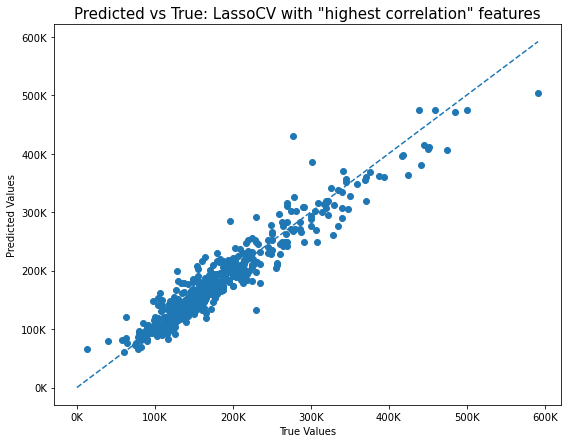

In [57]:
predict_lasso_highest_corr = lasso_cv.predict(Z_test_highest_corr)

fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,1)

plt.scatter(y_test, predict_lasso_highest_corr)

plt.plot([0, max(max(y_test),max(predict_lasso_highest_corr))],
         [0, max(max(y_test),max(predict_lasso_highest_corr))],
         linestyle = '--')    

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
plt.title('Predicted vs True: LassoCV with "highest correlation" features', fontsize = 15)
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

## Apply model on full train and test dataset for Kaggle

The model I have chosen is the **Lasso model with 'high correlation' features**. I will now run the model on the full training set before predicting the sale prices from the test set.

In [58]:
#Define X and y 

X_full_train_highest_corr = full_train[highest_corr_list]
X_full_test_highest_corr = full_test[highest_corr_list]
y_full_train = full_train['SalePrice']

In [59]:
#Scale the X variables

ss = StandardScaler()
Z_full_train_highest_corr = ss.fit_transform(X_full_train_highest_corr)
Z_full_test_highest_corr = ss.transform(X_full_test_highest_corr)

On the full training set, our model performs even better with RMSE = 22,886 (since there is more data points to train on now). 

In [60]:
%%time

#Find optimal alpha for Lasso regression with LassoCV
lasso_cv = LassoCV(
    alphas = np.logspace(-5, 5, 50),
    cv=10
)
    
#Fit train set
lasso_cv.fit(Z_full_train_highest_corr, y_full_train)
    
#Lasso cross val with best alpha
lasso_cv_optimal = cross_val_score(
    Lasso(alpha = lasso_cv.alpha_), 
    Z_full_train_highest_corr, 
    y_full_train, 
    cv= 10
)

best_lasso_alpha = np.round(lasso_cv.alpha_,5)
mean_lasso_cv_score = np.round(lasso_cv_optimal.mean(),5)
lasso_train_R2 = np.round(lasso_cv.score(Z_full_train_highest_corr, y_full_train),5)
    
lasso_train_MSE = np.round(mean_squared_error(y_full_train, lasso_cv.predict(Z_full_train_highest_corr)),5)
lasso_train_RMSE = np.round(np.sqrt(mean_squared_error(y_full_train, lasso_cv.predict(Z_full_train_highest_corr))),5)

print(" Lasso ".center(18, "=")+'\n')
print(f'best Lasso alpha is: {best_lasso_alpha}')
print(f'mean Lasso cross val score is: {mean_lasso_cv_score}'+'\n')
    
print(f'Lasso train R2 is: {lasso_train_R2}')      
print(f'Lasso train MSE is: {lasso_train_MSE}')   
print(f'Lasso train RMSE is: {lasso_train_RMSE}'+'\n')


===== Lasso ======

best Lasso alpha is: 54.28675
mean Lasso cross val score is: 0.90894

Lasso train R2 is: 0.91666
Lasso train MSE is: 523789831.14903
Lasso train RMSE is: 22886.45519

CPU times: user 2.23 s, sys: 23.6 ms, total: 2.25 s
Wall time: 577 ms


In [61]:
#Predict 'Sale Price' on the test set

pred = lasso_cv.predict(Z_full_test_highest_corr)
predict_y = pd.DataFrame(pred, columns=['SalePrice'])

In [62]:
submission = pd.read_csv(r'../datasets/submission_v1.csv')

In [63]:
submission['SalePrice'] = predict_y['SalePrice']

In [64]:
submission.to_csv(r'../datasets/submission.csv', index=False)

The Kaggle submission score is reflected in the first screenshot below. The RMSE for this Lasso model is 27,849.
<img src="https://i.imgur.com/Tv12qu0.png" style="float: center; margin: 20px; height: 400px">

I submitted a second score using the Linear regression model, and it actually has a lower RMSE of 24,560.
<img src="https://i.imgur.com/einEcot.png" style="float: center; margin: 20px; height: 400px">